In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc

%matplotlib inline
eventos = pd.read_csv("events.csv", low_memory=False)

# Análisis de los dispositivos

In [3]:
usuarios = eventos.drop_duplicates(subset="person",keep="first",inplace=False)
dispositivos = usuarios.loc[usuarios["device_type"] != "Unknown"]
cantDispositivos = dispositivos["device_type"].value_counts().reset_index()
cantDispositivos.columns = ["Tipo de dispositivo", "Cantidad"]
cantDispositivos

,Tipo de dispositivo,Cantidad
0,Smartphone,6326
1,Computer,4941
2,Tablet,235


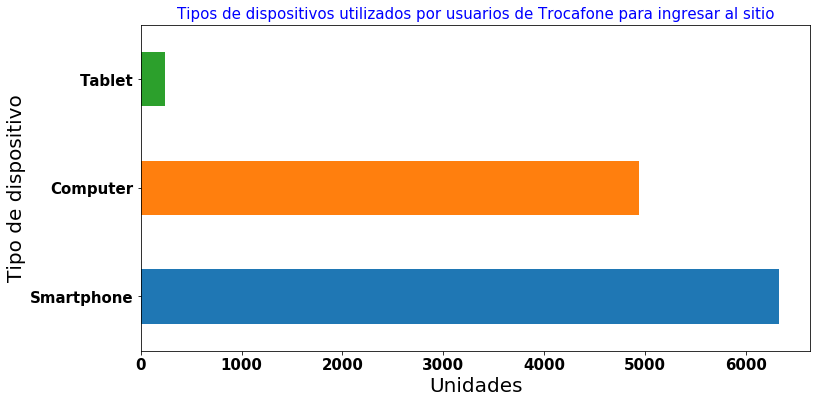

In [76]:
plotSisOp = dispositivos["device_type"].value_counts().plot(kind="barh",figsize=(12,6), fontsize=15)
plotSisOp.set_xlabel("Unidades",fontsize=20)
plotSisOp.set_ylabel("Tipo de dispositivo",fontsize=20)
plotSisOp.set_title("Tipos de dispositivos utilizados por usuarios de Trocafone para ingresar al sitio", fontsize=15,color ="blue")
plt.show()

#### Se observa que la mayoría de los usuarios ingresan desde un Smartphone o desde una computadora, por lo que se analizarán estos dos por separado para saber los SO de cada uno.

# Análisis de los SO (Smartphone)

In [5]:
eventosSO = usuarios[["device_type", "operating_system_version"]]
celulares = eventosSO.loc[eventosSO["device_type"]=="Smartphone"]
celulares["operating_system_version"].unique()

array(['Android 6', 'Android 5.1.1', 'Android 7.1.1', 'Android 7',
       'Android 5.0.2', 'Android 6.0.1', 'Android 4.2.2', 'Android 7.1.2',
       'iOS 11.2.2', 'iOS 11.3', 'iOS 10.3.3', 'Android 4.4.2',
       'Android 4.1.2', 'Android 8', 'Android 5', 'iOS 9.3.5',
       'Android 5.0.1', 'Android 4.3', 'Windows Phone 8.1',
       'Android 4.4.4', 'Android 8.1', 'iOS 11.2.6', 'Android 5.1',
       'iOS 11.2.5', 'iOS 11.4', 'iOS 7.1.2', 'Android 4.4.3',
       'iOS 10.3.2', 'Windows Phone 8', 'iOS 11.2.1', 'Android ',
       'iOS 10.0.2', 'iOS 11.1', 'iOS 11.1.2', 'iOS 10.2.1', 'Other ',
       'Windows Phone 10', 'iOS 11.0.1', 'iOS 4', 'iOS 7.1.1',
       'Android 4.0.4', 'iOS 11.0.3', 'iOS 9.3.4', 'iOS 8.1',
       'iOS 10.3.1', 'iOS 11.1.1', 'Android 2.3.6', 'iOS 10.1.1',
       'iOS 8.4', 'iOS 11.2', 'iOS 9.3.2', 'Android 6.3', 'Android 4.4.1',
       'iOS 8.1.1', 'Android 4.1.1', 'iOS 11.0.2', 'iOS 6.1.6',
       'iOS 10.2'], dtype=object)

In [6]:
celulares = celulares.loc[celulares["operating_system_version"] != "Other "]
celulares["Sistema operativo"] = celulares.apply( lambda x: str(x["operating_system_version"]).split()[0], axis = 1)
sisOpCelulares = celulares["Sistema operativo"].value_counts().reset_index()
sisOpCelulares.columns = ['Sistema operativo','cantidad']
sisOpCelulares

,Sistema operativo,cantidad
0,Android,5661
1,iOS,611
2,Windows,41


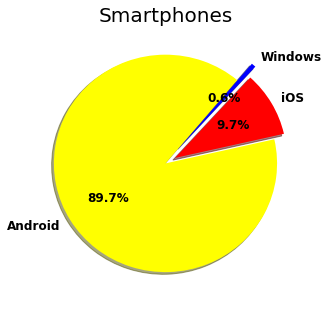

In [162]:
plt.figure(figsize=(5, 5))
sizes = sisOpCelulares["cantidad"]
nombres = ['Android', 'iOS', 'Windows']
plt.title('Smartphones', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=50, colors=['yellow', 'red', 'blue'], explode=(0, 0.1, 0.2),shadow = True, textprops={'fontsize': 12})
plt.show()

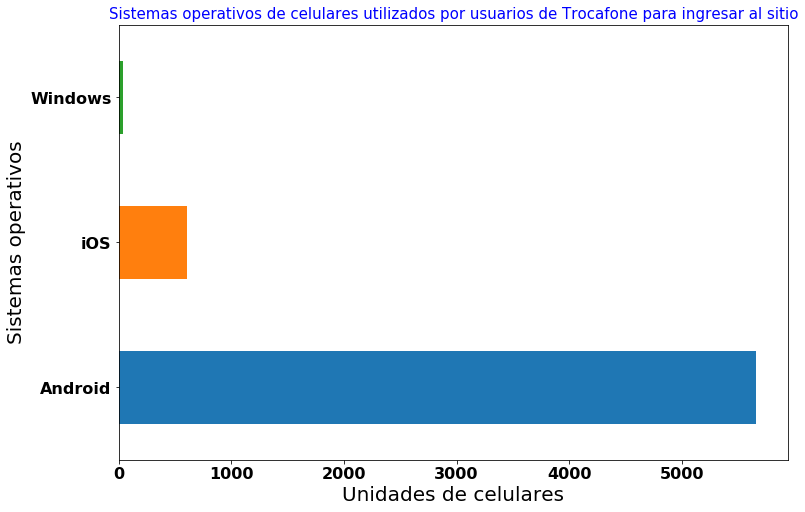

In [77]:
plot = celulares["Sistema operativo"].value_counts().plot(kind="barh",figsize=(12,8), fontsize=16)
plot.set_xlabel("Unidades de celulares",fontsize=20)
plot.set_ylabel("Sistemas operativos",fontsize=20)
plot.set_title("Sistemas operativos de celulares utilizados por usuarios de Trocafone para ingresar al sitio", fontsize=15,color ="blue")
plt.show()

#### Analizando los sistemas operativos desde donde se originan los eventos vemos que la mayoría de las personas que ingresan al sitio lo hacen desde un dispositivo Android. Esto lleva a pensar que si en algún momento se quisiera invertir en una aplicación móvil de Trocafone lo más conveniente sería arrancar por una que fuera compatible con dicho sistema operativo para tener la posibilidad de llegar a más personas.

# Análisis de los SO (computadoras)

In [8]:
eventosSO = usuarios[["device_type", "operating_system_version"]]
computadoras = eventosSO.loc[eventosSO["device_type"]=="Computer"]
computadoras["operating_system_version"].unique()

array(['Windows 10 ', 'Windows 7 ', 'Linux ', 'Mac OS X 10.13.5',
       'Windows 8.1 ', 'Windows Vista ', 'Windows 8 ', 'Mac OS X 10.11.6',
       'Windows XP ', 'Ubuntu ', 'Mac OS X 10.6.4', 'Mac OS X 10.13.4',
       'Mac OS X 10.13.3', 'Mac OS X 10.12.6', 'Windows RT ',
       'Mac OS X 10.6.8', 'Mac OS X 10.10.5', 'Mac OS X 10.12.5',
       'Mac OS X 10.10.1', 'Mac OS X 10.13.2', 'Mac OS X 10.11.3',
       'Mac OS X 10.7.5', 'Mac OS X 10.11.4', 'Mac OS X 10.10',
       'Mac OS X 10.9.5', 'Mac OS X 10.12.3', 'Mac OS X 10.10.4'],
      dtype=object)

In [82]:
computadoras["Sistema operativo"] = computadoras.apply( lambda x: str(x["operating_system_version"]).split()[0], axis = 1)
sisOpComputadoras = computadoras["Sistema operativo"].value_counts().reset_index()
sisOpComputadoras.columns = ['Sistema operativo','cantidad']
sisOpComputadoras

/home/facundo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sistema operativo,cantidad
0,Windows,4826
1,Mac,59
2,Linux,39
3,Ubuntu,17


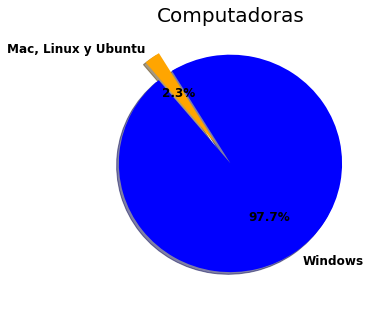

In [137]:
windows = sisOpComputadoras.loc[sisOpComputadoras["Sistema operativo"] == "Windows"]["cantidad"].sum()
otros = sisOpComputadoras.loc[sisOpComputadoras["Sistema operativo"] != "Windows"]["cantidad"].sum()
plt.figure(figsize=(5, 5))
sizes = [windows, otros]
nombres = ['Windows', 'Mac, Linux y Ubuntu']
plt.title('Computadoras', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=130, colors=['blue', 'orange'], explode=(0, 0.2),shadow = True, textprops={'fontsize': 12})
plt.show()

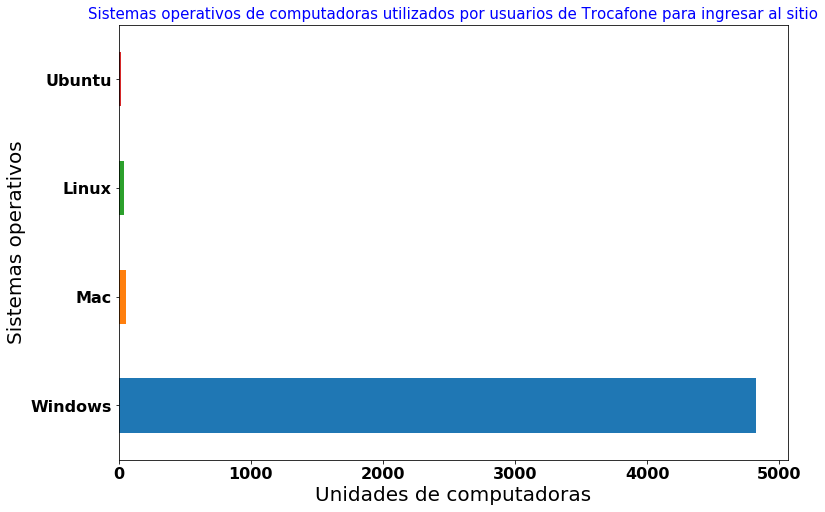

In [78]:
plot = computadoras["Sistema operativo"].value_counts().plot(kind="barh",figsize=(12,8), fontsize=16)
plot.set_xlabel("Unidades de computadoras",fontsize=20)
plot.set_ylabel("Sistemas operativos",fontsize=20)
plot.set_title("Sistemas operativos de computadoras utilizados por usuarios de Trocafone para ingresar al sitio", fontsize=15,color ="blue")
plt.show()

#### Se puede decir que prácticamente todos los usuarios de Trocafone que ingresan desde una computadora lo hacen con el sistema operativo Windows.

# Análisis de los SO (Tablets)

In [11]:
tabletsSO = usuarios[["device_type", "operating_system_version"]]
tablets = tabletsSO.loc[tabletsSO["device_type"]=="Tablet"]
tablets["operating_system_version"].unique()

array(['Android 4.4.4', 'Android 5.1.1', 'Android 4.2.2', 'Android 7.1.2',
       'Android 4.1.2', 'iOS 11.4', 'Android 7.1.1', 'iOS 9.3.5',
       'Android 7', 'iOS 11.3', 'iOS 3.2', 'Android 5', 'Android 4.4.2',
       'Android 6.0.1', 'Android 5.1', 'iOS 11.2.6', 'Android 6',
       'iOS 11.1.2', 'iOS 11.2.1', 'iOS 10.3.3', 'iOS 11.0.2',
       'Android 4.3', 'iOS 11.2.5', 'Android 4.1.1', 'iOS 10.3.2',
       'iOS 8.1.1', 'iOS 10.1.1', 'iOS 11.0.3', 'iOS 10.2.1',
       'Android 4.4', 'iOS 10.0.1', 'Android 4.0.4', 'iOS 5.0.1'],
      dtype=object)

In [12]:
tablets["Sistema operativo"] = tablets.apply( lambda x: str(x["operating_system_version"]).split()[0], axis = 1)
sisOpTablets = tablets["Sistema operativo"].value_counts().reset_index()
sisOpTablets.columns = ['Sistema operativo','cantidad']
sisOpTablets

/home/facundo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sistema operativo,cantidad
0,Android,178
1,iOS,57


0    178
1     57
Name: cantidad, dtype: int64

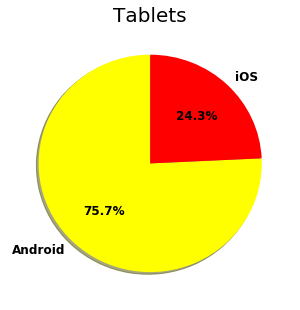

In [148]:
plt.figure(figsize=(5, 5))
sizes = sisOpTablets["cantidad"]
nombres = ['Android', 'iOS']
plt.title('Tablets', fontsize=20)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', startangle=90, colors=['yellow', 'red'], explode=(0, 0),shadow = True, textprops={'fontsize': 12})
plt.show()

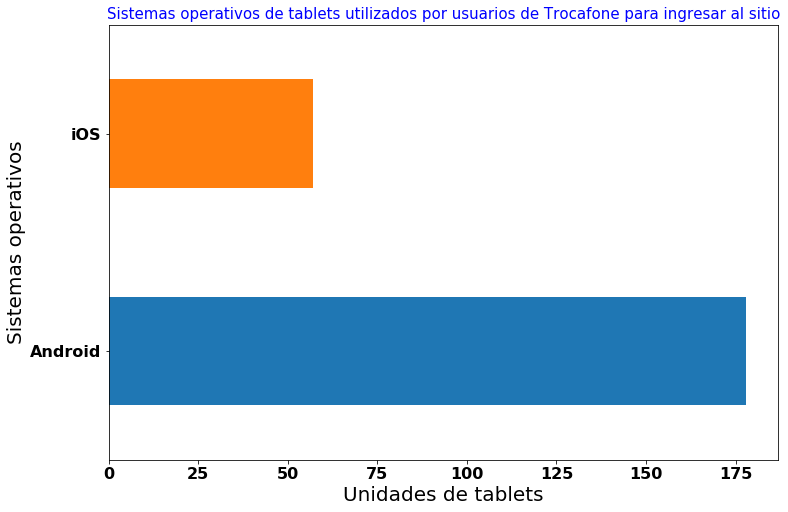

In [79]:
plot = tablets["Sistema operativo"].value_counts().plot(kind="barh",figsize=(12,8), fontsize=16)
plot.set_xlabel("Unidades de tablets",fontsize=20)
plot.set_ylabel("Sistemas operativos",fontsize=20)
plot.set_title("Sistemas operativos de tablets utilizados por usuarios de Trocafone para ingresar al sitio", fontsize=15,color ="blue")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

eventos = pd.read_csv("events.csv", low_memory=False)

ventas = eventos.loc[eventos["event"]=="conversion"]
ventas = ventas.loc[(ventas["condition"] != "Bom - Sem Touch ID") & (ventas["condition"] != "Novo")]
ventas = ventas["condition"].value_counts().reset_index()
ventas

condiciones = list(ventas["index"].unique())
cantidades = list(ventas["condition"].unique().flatten())
cantidades += cantidades[:1]
cantidades
N = len(condiciones)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
angles

ax = plt.subplot(111, polar=True)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], ["Bueno", "Muy bueno", "Excelente"], color='grey', size=20,horizontalalignment="right")
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([200,300,400, 500, 600], ["200","300","400", "500", "600"], color="grey", size=7)
plt.ylim(0,600)
# Plot data
ax.plot(angles, cantidades, linewidth=1, linestyle='solid')
# Fill area
ax.fill(angles, cantidades, 'b', alpha=0.1)